# A few words before code

Data set - Music & Mental Health Survey Results

I've decided to choose this dataset because music is a big part of my life. Every day I listen to my own and others play-lists, lo-fi and indie-rock radios and etc. Sometimes I even make my own riffs, melodies and rythms on the guitar in DAW.

When i saw this dataset for the first time, I understood that it can be really interesting to find corellations between person's fav genre, age, fav platform and his mental health problems. How do musicians differ from non-musicians and etc.

Мне правда стало интересно, как прослушивание определенных музыкальных жанров способно повлиять на ментальное здоровье человека, и существуют ли какие-нибудь кореляции между возрастам человека, его любимой платформамой для прослушивания музыки, а также предпочитаемыми музыкальными жанрами


# Import libraries and show dataset (preparations before work)

In [224]:
import pandas as pd
from plotly.offline import plot
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [225]:
df = pd.read_csv('sample_data/mxmh_survey_results.csv') #read data
dfcop = df.copy(deep=True) #copy of dataset

#show df
df

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


# Cleaning

#### Check data types in dataset
Now we need to check if there is any damaged information in our dataset

In [226]:
#we'll check our dataset for empty cells or NaN's or incorrect data
#as we can see there is only NaNs and no incorrect data
print(df['Primary streaming service'].unique())
print(df['Age'].unique())
print(df['While working'].unique())
print(df['Instrumentalist'].unique())
print(df['Composer'].unique())
print(df['Fav genre'].unique())
print(df['Exploratory'].unique())
print(df['Foreign languages'].unique())
print(df['Music effects'].unique())
df.isna().sum()

['Spotify' 'Pandora' 'YouTube Music' 'I do not use a streaming service.'
 'Apple Music' 'Other streaming service' nan]
[18. 63. 61. 21. 19. nan 17. 16. 15. 14. 20. 26. 23. 37. 36. 24. 22. 42.
 25. 32. 29. 41. 31. 33. 30. 43. 28. 34. 13. 35. 27. 53. 49. 60. 38. 44.
 40. 64. 56. 59. 10. 12. 54. 57. 69. 72. 73. 39. 58. 67. 70. 55. 48. 71.
 74. 51. 65. 80. 50. 68. 46. 89.]
['Yes' 'No' nan]
['Yes' 'No' nan]
['Yes' 'No' nan]
['Latin' 'Rock' 'Video game music' 'Jazz' 'R&B' 'K pop' 'Country' 'EDM'
 'Hip hop' 'Pop' 'Rap' 'Classical' 'Metal' 'Folk' 'Lofi' 'Gospel']
['Yes' 'No']
['Yes' 'No' nan]
[nan 'No effect' 'Improve' 'Worsen']


Timestamp                         0
Age                               1
Primary streaming service         1
Hours per day                     0
While working                     3
Instrumentalist                   4
Composer                          1
Fav genre                         0
Exploratory                       0
Foreign languages                 4
BPM                             107
Frequency [Classical]             0
Frequency [Country]               0
Frequency [EDM]                   0
Frequency [Folk]                  0
Frequency [Gospel]                0
Frequency [Hip hop]               0
Frequency [Jazz]                  0
Frequency [K pop]                 0
Frequency [Latin]                 0
Frequency [Lofi]                  0
Frequency [Metal]                 0
Frequency [Pop]                   0
Frequency [R&B]                   0
Frequency [Rap]                   0
Frequency [Rock]                  0
Frequency [Video game music]      0
Anxiety                     

#### Work with NaN's
I'll create two dataframes:
with NaNs but changing them to 'NotStated' and without NaNs

In [227]:
#As you can see no NaNs
df = df.fillna('NotStated')
df.isna().sum()

Timestamp                       0
Age                             0
Primary streaming service       0
Hours per day                   0
While working                   0
Instrumentalist                 0
Composer                        0
Fav genre                       0
Exploratory                     0
Foreign languages               0
BPM                             0
Frequency [Classical]           0
Frequency [Country]             0
Frequency [EDM]                 0
Frequency [Folk]                0
Frequency [Gospel]              0
Frequency [Hip hop]             0
Frequency [Jazz]                0
Frequency [K pop]               0
Frequency [Latin]               0
Frequency [Lofi]                0
Frequency [Metal]               0
Frequency [Pop]                 0
Frequency [R&B]                 0
Frequency [Rap]                 0
Frequency [Rock]                0
Frequency [Video game music]    0
Anxiety                         0
Depression                      0
Insomnia      

In [228]:
#that's all ellements what we have replaced with NotStated

print(df[df['Age'] == 'NotStated']['Age'])
print('___________________________________________')

print(df[df['Primary streaming service'] == 'NotStated']['Primary streaming service'])
print('___________________________________________')

print(df[df['While working'] == 'NotStated']['While working'])
print('___________________________________________')

print(df[df['Instrumentalist'] == 'NotStated']['Instrumentalist'])
print('___________________________________________')

print(df[df['Foreign languages'] == 'NotStated']['Foreign languages'])
print('___________________________________________')

print(df[df['BPM'] == 'NotStated']['BPM'])
print('___________________________________________')

print(df[df['Music effects'] == 'NotStated']['Music effects'])
print('___________________________________________')


12    NotStated
Name: Age, dtype: object
___________________________________________
197    NotStated
Name: Primary streaming service, dtype: object
___________________________________________
57     NotStated
426    NotStated
561    NotStated
Name: While working, dtype: object
___________________________________________
223    NotStated
408    NotStated
561    NotStated
572    NotStated
Name: Instrumentalist, dtype: object
___________________________________________
235    NotStated
396    NotStated
561    NotStated
666    NotStated
Name: Foreign languages, dtype: object
___________________________________________
10     NotStated
12     NotStated
15     NotStated
30     NotStated
32     NotStated
         ...    
688    NotStated
700    NotStated
706    NotStated
712    NotStated
717    NotStated
Name: BPM, Length: 107, dtype: object
___________________________________________
0      NotStated
1      NotStated
161    NotStated
168    NotStated
338    NotStated
441    NotStated
532   

In [229]:
#show df with NotStated
df

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NotStated,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NotStated,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.



As you can see, I have replaced all the NaNs with str value = NotStated.
And then i'll create dataframe without NaNs


In [230]:
dfcop = dfcop.dropna() #copy without nans and NotStated
dfcop

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
5,8/27/2022 21:56:50,18.0,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,...,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,I understand.
6,8/27/2022 22:00:29,18.0,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,...,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


# Now, when we've cleaned our dataset, we can start to analyze it

## All people

### Check binary data (Yes/No)
Just information(no analysis)

Here i'll check (Yes/No) information in my dataset. I think that this will be interesting. And i think that there is no need in analysis because it is obvious

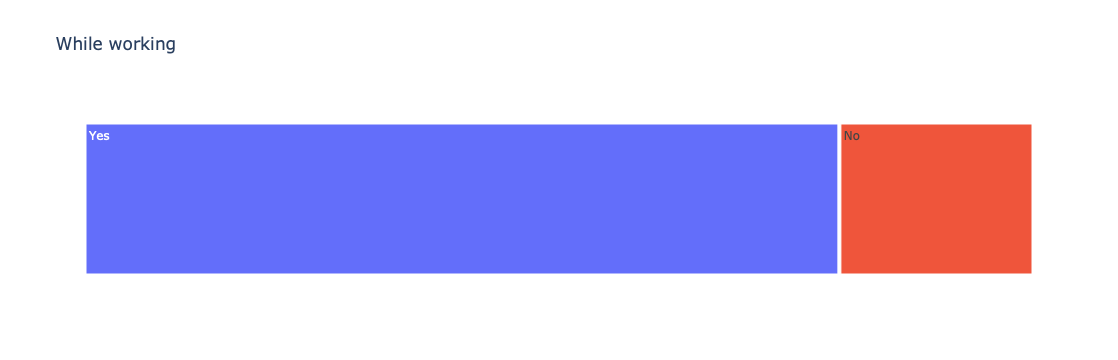

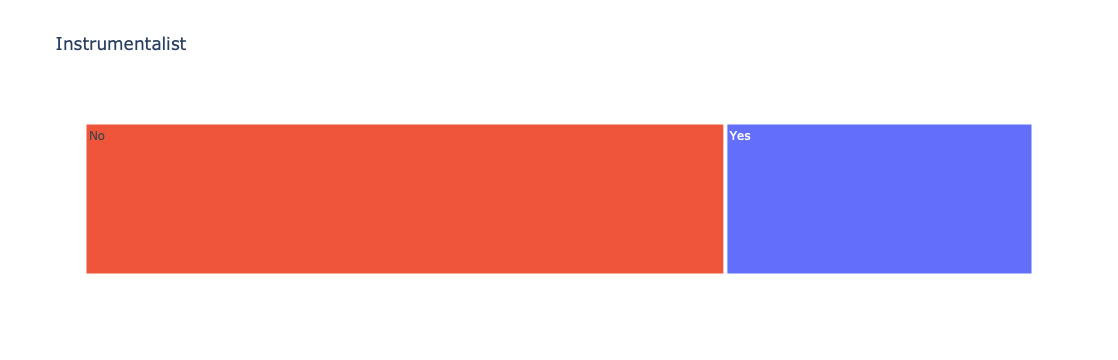

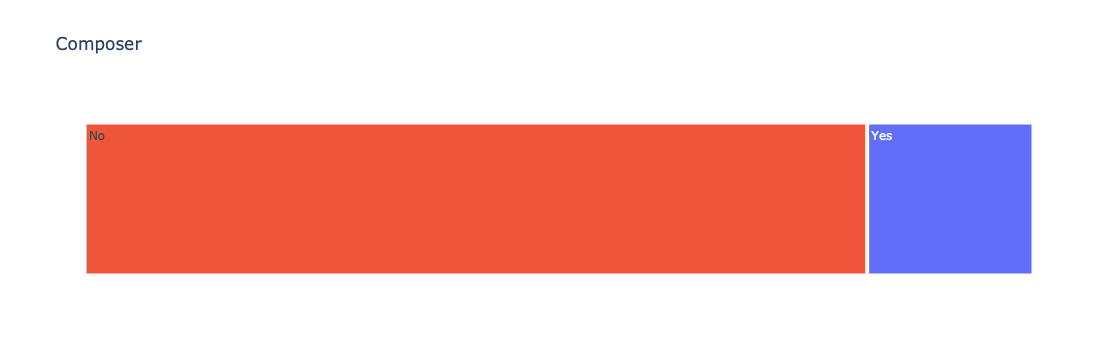

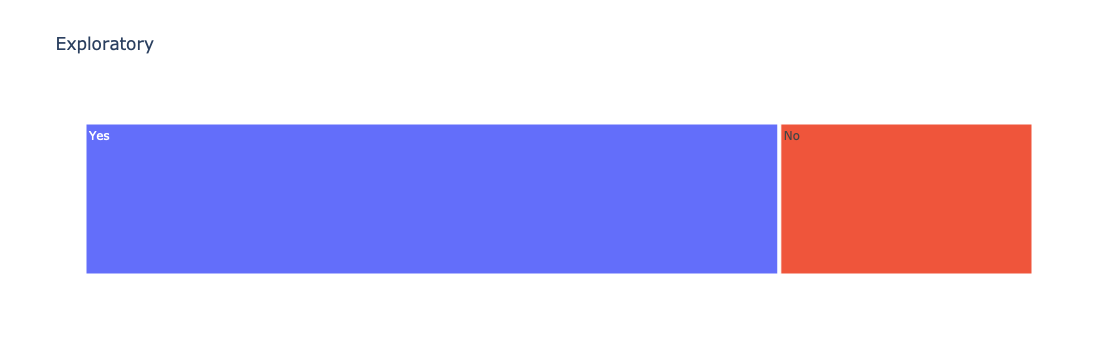

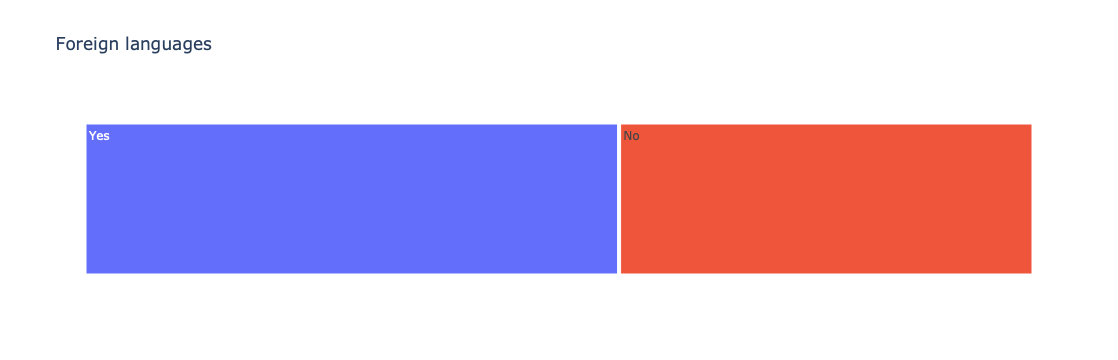

In [231]:
#Create new df with a new column 'Calc'
dfBoolean = dfcop.loc[:,['While working','Instrumentalist','Composer','Exploratory','Foreign languages']]
dfBoolean['Calc'] = 1

#Plot1
fig = px.treemap(
    dfBoolean, 
    path=['While working'],
    title='While working',
    values='Calc',
    color_discrete_sequence=[px.colors.qualitative.Plotly[0], px.colors.qualitative.Plotly[1]],
)
fig.show()

#Plot2
fig = px.treemap(
    dfBoolean, 
    path=['Instrumentalist'],
    title='Instrumentalist',
    values='Calc',
    color_discrete_sequence=[px.colors.qualitative.Plotly[1], px.colors.qualitative.Plotly[0]]
)
fig.show()

#Plot3
fig = px.treemap(
    dfBoolean, 
    path=['Composer'],
    title='Composer',
    values='Calc',
    color_discrete_sequence=[px.colors.qualitative.Plotly[1], px.colors.qualitative.Plotly[0]]
)
fig.show()

#Plot4
fig = px.treemap(
    dfBoolean, 
    path=['Exploratory'],
    title='Exploratory',
    values='Calc',
    color_discrete_sequence=[px.colors.qualitative.Plotly[0], px.colors.qualitative.Plotly[1]]
)
fig.show()

#Plot5
fig = px.treemap(
    dfBoolean, 
    path=['Foreign languages'],
    title='Foreign languages',
    values='Calc',
    color_discrete_sequence=[px.colors.qualitative.Plotly[0], px.colors.qualitative.Plotly[1]]
)
fig.show()

### Platform analyze

#### Check the most popular platform and how much time people spend on different platforms

Here i'll just check mean values of hours that people spend on each platform. My hypothesis that the most popular platform is Spotify

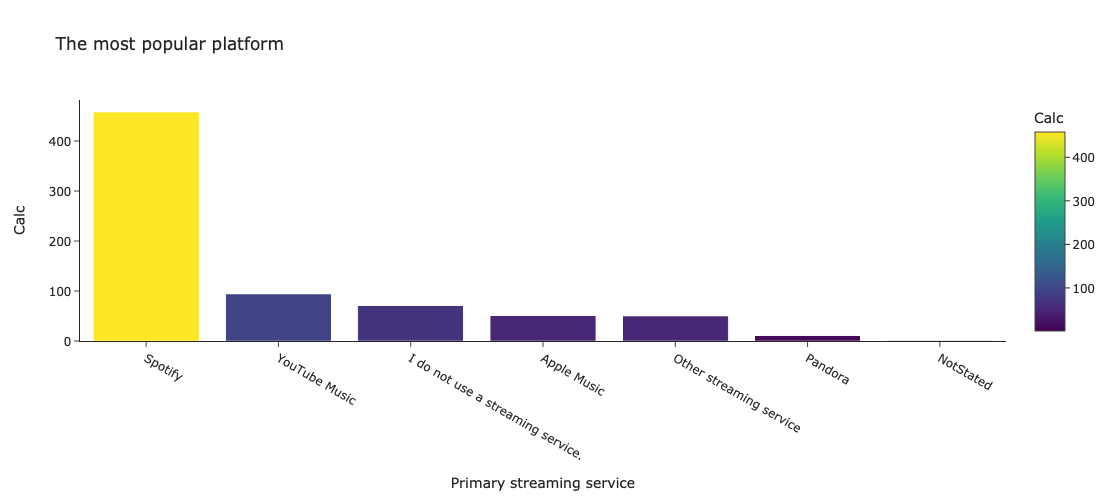

In [232]:
#Create a new groupedby df with a new column 'Calc' and then sort it by this column values
dfPopPlat = df.loc[:,['Primary streaming service']]
dfPopPlat['Calc']= 1 
dfPopPlat = dfPopPlat.groupby('Primary streaming service', as_index=False).sum().sort_values('Calc', ascending=False)

#Plot
fig = px.bar(
    dfPopPlat, 
    x='Primary streaming service',
    y='Calc', 
    color = 'Calc',
    title='The most popular platform',
    height=500,
    width=1000,
    template="simple_white"
)

fig.show()

I was right

Here i'll check the mean value of hours that people spend on music per day for different platforms

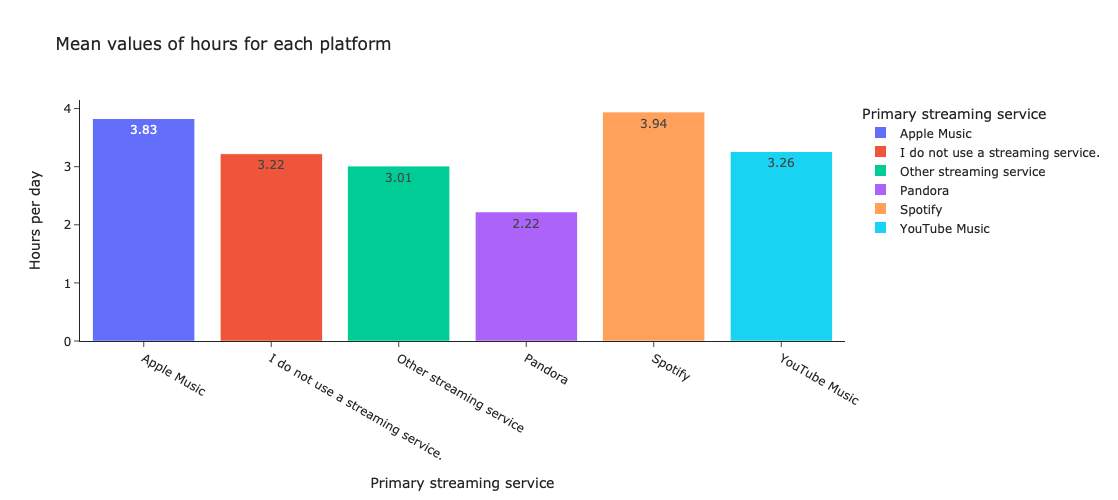

In [233]:
#Create new df
dfHourPlat = dfcop.loc[:,['Primary streaming service','Hours per day']]

#Groupby and count mean value
dfHourMean = dfHourPlat.groupby("Primary streaming service", as_index = False).mean().round(2)

#Plot
fig = px.bar(
    dfHourMean, 
    y = 'Hours per day', 
    x = 'Primary streaming service', 
    text = 'Hours per day', 
    color = 'Primary streaming service', 
    title='Mean values of hours for each platform',
    height=500,
    width=1000,
    template="simple_white",
    color_discrete_sequence=px.colors.qualitative.Plotly
)

fig.show()

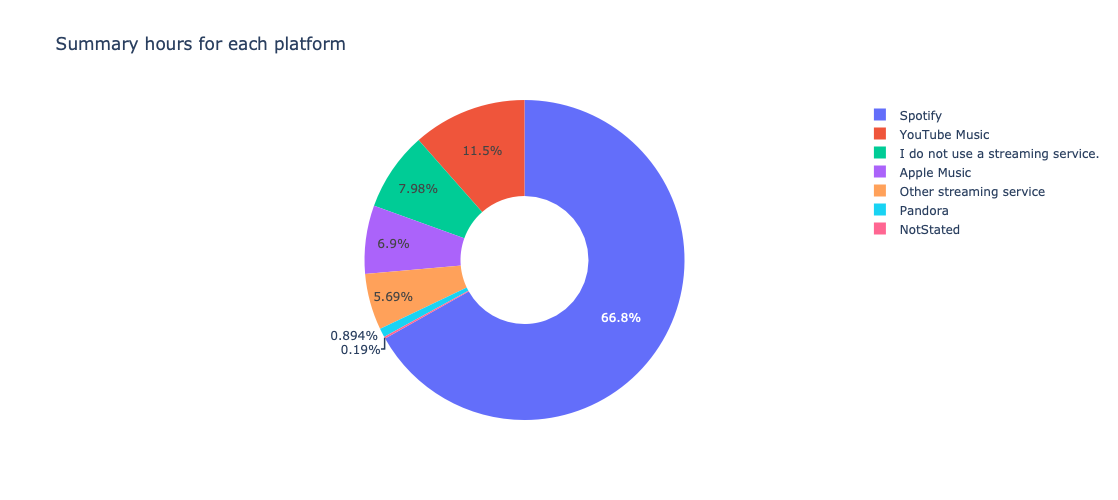

In [234]:
#Just show this df again (not necessary)
dfHourPlat = df.loc[:,['Primary streaming service','Hours per day']]

#Plot
fig = px.pie(
    dfHourPlat, 
    values='Hours per day', 
    names='Primary streaming service',
    title='Summary hours for each platform',
    hole=.4,
    width=1000,
    height=500
)
fig.show()

#### Platforms and mental health problems

In this dataset there are 4 columns with mental health problems: OCD, Depression, Anxiety and Insomnia.
I'll combine them into one abstract "mental problem" by summarizing their values. This will help us to do "easy-to-analyze" plots

In [235]:
#Creating dataframe dfMentalPlat with 5 columns and add another one - 'Sum' by summarazing OCD, Depression, Anxiety and Insomnia columns
dfMentalPlat = dfcop.loc[:,['Primary streaming service','OCD','Depression','Anxiety','Insomnia']]
dfMentalPlat = dfMentalPlat.assign(Sum=lambda x: x.OCD + x.Anxiety + x.Depression + x.Insomnia)

#There I've created new df - dfMentalPlatSum by using method .groupby on dfMentalPlat on "Primary streaming service" column
#and sum all values. Then i've sorted this df by .sort_values
dfMentalPlatSum = dfMentalPlat.groupby("Primary streaming service", as_index = False).sum()
dfMentalPlatSum.sort_values('Sum', ascending=False, inplace=True)

#The same as the previouse but instead of sum method I've used mean method
dfMentalPlatMean = dfMentalPlat.groupby("Primary streaming service", as_index = False).mean().round(2)
dfMentalPlatMean.sort_values('Sum', ascending=False, inplace=True)

I have the hypothesis that the most mental ill platform is a YouTube Music because there is a lot of live streams with different music genres to study. For example lo-fi radio to study and work(Lo-Fi Girl). Core audience of this translations is 15-26 years old people and I think that the most mental health problems pop up in the age of 18. So thats why i think YouTube Music has the vast majority of people with mental health problems.

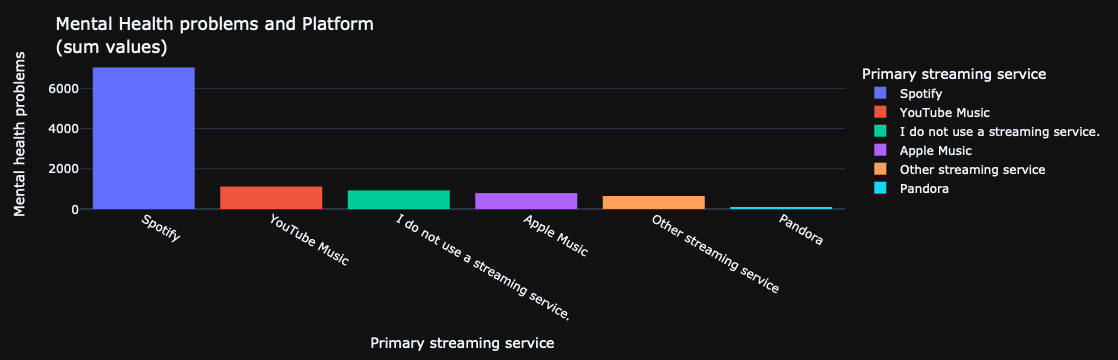

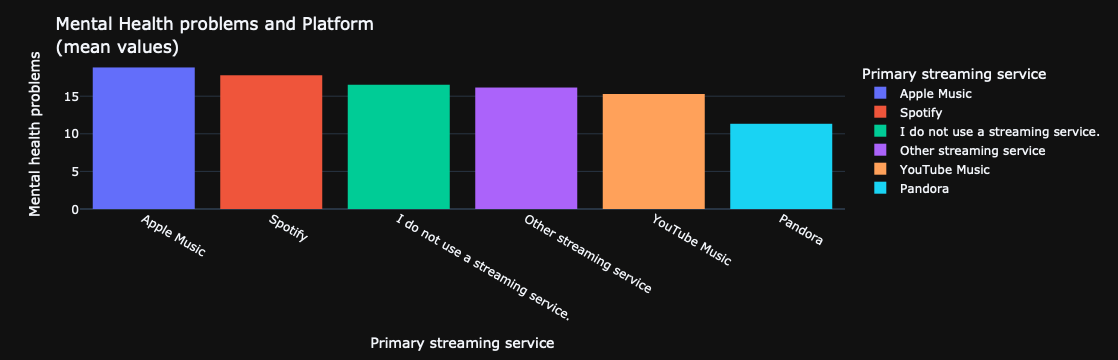

In [236]:
#first plot with sum values
fig = px.histogram(
    dfMentalPlatSum, 
    x='Primary streaming service', 
    y='Sum', 
    color='Primary streaming service'
)

fig.update_layout(
    title ='Mental Health problems and Platform<br>(sum values)', 
    xaxis_title='Primary streaming service',
    yaxis_title='Mental health problems',
    template='plotly_dark',
)

fig.show()


#second plot with mean values
fig = px.histogram(
    dfMentalPlatMean, 
    x='Primary streaming service', 
    y='Sum', 
    color='Primary streaming service'
)

fig.update_layout(
    title ='Mental Health problems and Platform<br>(mean values)', 
    xaxis_title='Primary streaming service',
    yaxis_title='Mental health problems',
    template='plotly_dark',
)

fig.show()

My hypothesis was wrong. Apple music has the vast majority of people with mental health problems in mean values. You can say that Spotify has the vast majority of people with mental health problems but this is because it is the most popular platform in this dataset.

### Genre analyze

#### Check the most popular genre

There i'll check the most popular genre in dataset. My hypothesis is that this will be a Pop music

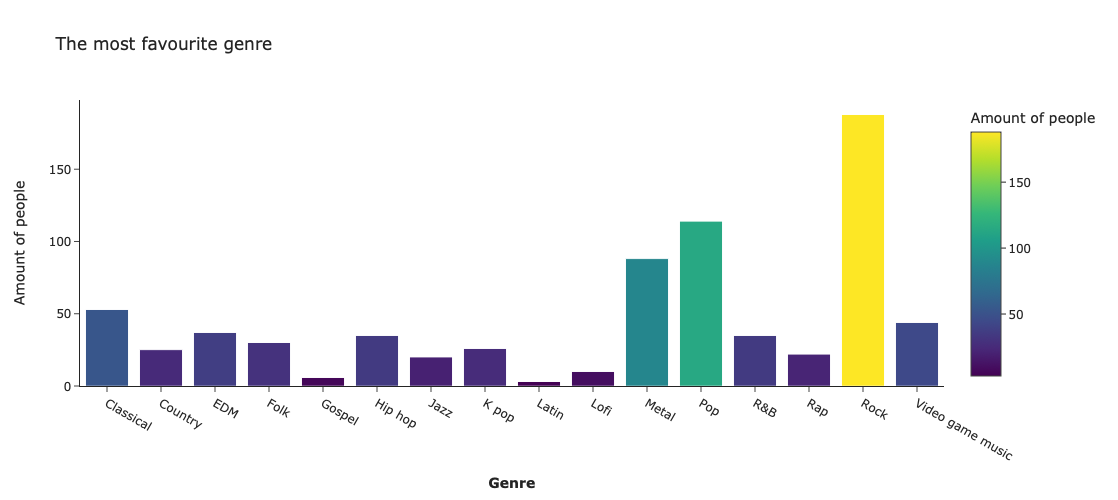

In [237]:
#Create new df with a new column 'Amount of people'
dfGen = df.loc[:,['Fav genre']]
dfGen['Amount of people'] = 1

#Just groupby
dfSumG2 = dfGen.groupby('Fav genre',as_index= False).sum()

#Plot
fig = px.bar(
    dfSumG2, 
    x='Fav genre',
    y='Amount of people', 
    color = 'Amount of people',
    title='The most favourite genre',
    height=500,
    width=1000,
    template="simple_white"
)

fig.update_layout(
    xaxis_title='<b>Genre</b>'
)

fig.show()

My hypothesis was wrong. And it is really interesting that Rock is more popular than Pop in this dataset

#### Trying to find correlations between favourite genre and mental health problems

My hypothesis is that Lo-Fi genre has the most people with mental health problems in mean values. The reasons why i think this way were already told.

In [238]:
#Create new df with a new column by summarazing next columns: Anxiety, Depression, Insomnia and OCD
df_3 = dfcop.loc[:,['Age','Fav genre', 'Anxiety','Depression','Insomnia','OCD','Hours per day']]
df_3 = df_3.assign(Sum=lambda x: x.OCD + x.Anxiety + x.Depression + x.Insomnia)

#Groupby and sort for sum
df_3S = df_3.groupby('Fav genre', as_index=False).sum()
df_3S.sort_values('Sum', ascending=False, inplace=True)

#Groupby and sort for mean
df_3M = df_3.groupby('Fav genre', as_index=False).mean().round(2)
df_3M.sort_values('Sum', ascending=False, inplace=True)

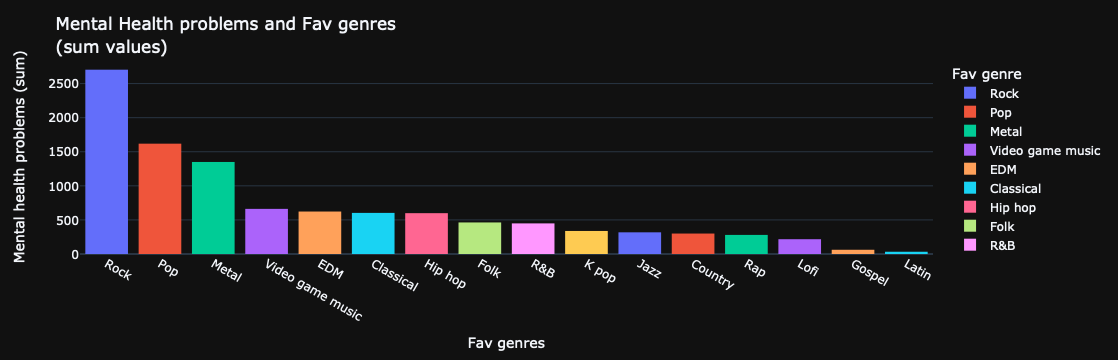

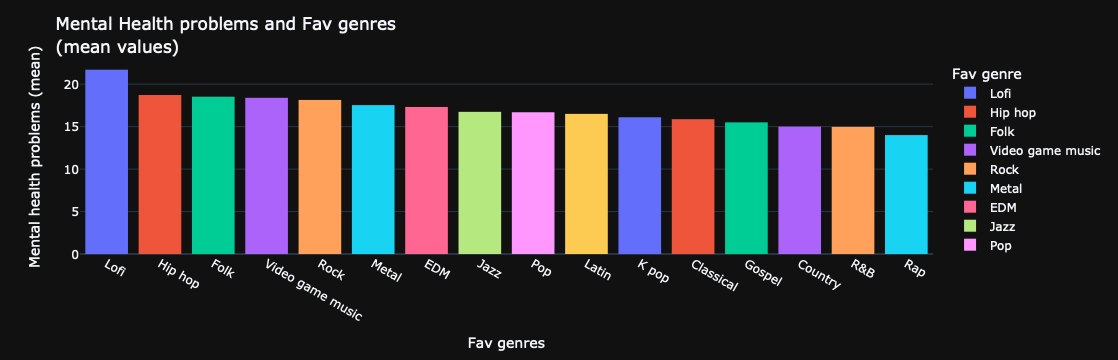

In [239]:
#Plot1(Sum values)
fig = px.histogram(
    df_3S, 
    x='Fav genre', 
    y='Sum', 
    color='Fav genre'
)

fig.update_layout(
    title ='Mental Health problems and Fav genres<br>(sum values)', 
    xaxis_title='Fav genres',
    yaxis_title='Mental health problems (sum)',
    template='plotly_dark',
)

fig.show()


#Plot2(Mean values)
fig = px.histogram(
    df_3M, 
    x='Fav genre', 
    y='Sum', 
    color='Fav genre'
)

fig.update_layout(
    title ='Mental Health problems and Fav genres<br>(mean values)', 
    xaxis_title='Fav genres',
    yaxis_title='Mental health problems (mean)',
    template='plotly_dark',
)

fig.show()

My hypothesis was right

### Age analyze

#### Check amount of young, middle age and old people

Here I'll create 3 dataframes with <u>Young</u>( < 30 y.o.), <u>Middle aged</u>( 50 < and >= 30 ) and <u>Old people</u>( >= 60) to compare their percentage in dataset. This will help us to understand the difference in quantity between all of these groups of people.

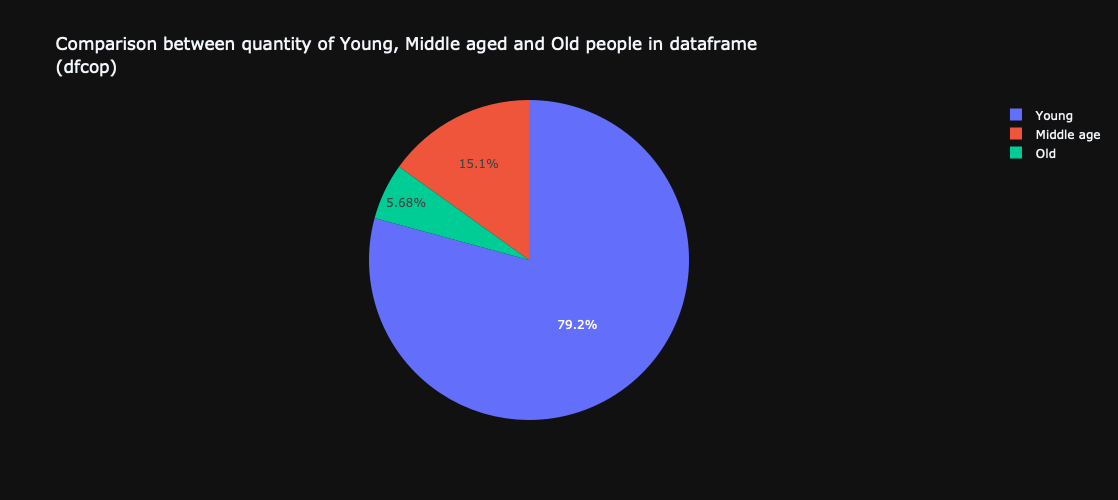

In [240]:
#Here I'll create 3 dataframes with Young, Middle aged and Old people to compare their percentage in dataset

#I use dfcop df instead df because it is easier to work with it

#Create df with the Young people and a variable with their quatity
dfAgeY = dfcop.loc[dfcop['Age'] < 30]
Yl = len(dfAgeY)

#Create df with the Middle aged people and a variable with their quatity
dfAgeM = dfcop.loc[(dfcop['Age'] >= 30) & ( dfcop['Age'] < 50)]
Ml = len(dfAgeM)

#Create df with the Old people and a variable with their quatity
dfAgeO = dfcop.loc[(dfcop['Age'] >= 50)]
Ol = len(dfAgeO)

#Plot
fig = px.pie(
    dfHourPlat, 
    values=[Yl,Ml,Ol], 
    names=['Young','Middle age','Old'],
    title='Comparison between quantity of Young, Middle aged and Old people in dataframe<br>(dfcop)',
    width=1000,
    height=500,
    template='plotly_dark',
)

fig.show()

#sum of all the people is 616
#print(Yl+Ml+Ol)

#### Correlation between age and mental health problems

My hypothesis is that the most stressed year in person's life is 18-th year. It is quite logical because in this years there is alot of changes in person's life style in general. 

##### Sum(Age)

In [241]:
#Create new df, add new column with a sum of mental problems and groupby it by age 
df3d = dfcop.loc[:,['Age','Anxiety','Depression','Insomnia','OCD']]
df3d = df3d.assign(Sum=lambda x: x.OCD + x.Anxiety + x.Depression + x.Insomnia)
df3d = df3d.groupby('Age', as_index= False).sum()

#fig = px.line_3d(df3d, x="Age", y='Hours per day'z="Anxiety")
#fig.show()

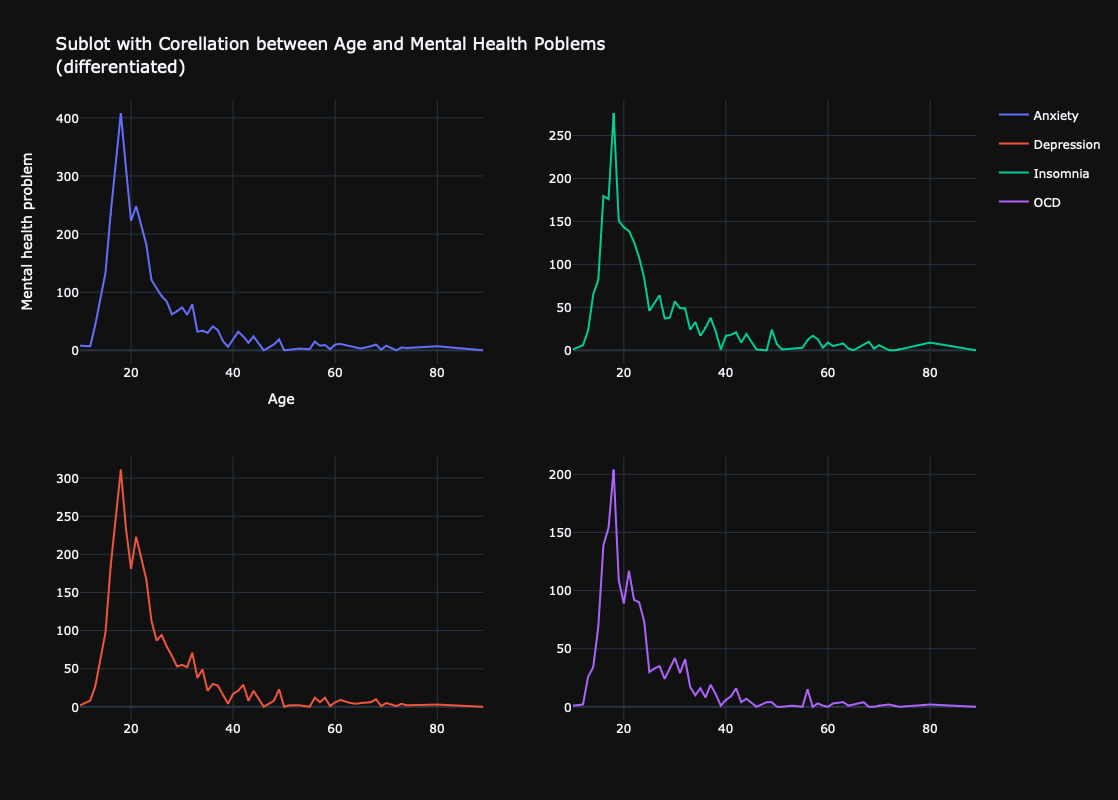

In [242]:
#Here i'll create subplot with 4 figures (line graphs)

#First two figures
figures = [
    
    #Figure 1 (Corellation between Age and Anxiety)
    px.line(
        df3d, 
        x="Age",
        y=["Anxiety"],
        title='Corellation between age and Mental Health Poblems',
        width = 300,
        height = 300,
        color_discrete_sequence=[px.colors.qualitative.Plotly[0]],
    ),

    #Figure 2 (Corellation between Age and Depression)
    px.line(
        df3d, 
        x="Age",
        y=['Depression'],
        title='Corellation between age and Mental Health Poblems',
        width = 300,
        height = 300,
        color_discrete_sequence=[px.colors.qualitative.Plotly[1]],
    ),
]

#Second two figures
figures2 = [ 
    
    #Figure 3 (Corellation between Age and Insomnia)
    px.line(
        df3d, 
        x="Age",
        y=['Insomnia'],
        title='Corellation between age and Mental Health Poblems',
        width = 300,
        height = 300,
        color_discrete_sequence=[px.colors.qualitative.Plotly[2]]
    ),

    #Figure 4 (Corellation between Age and OCD)
    px.line(
        df3d, 
        x="Age",
        y=['OCD'],
        title='Corellation between age and Mental Health Poblems',
        width = 300,
        height = 300,
        color_discrete_sequence=[px.colors.qualitative.Plotly[3]]
    ),
]

#Creating subplot with 2 rows and 2 columns
fig = make_subplots(rows=len(figures), cols=2) 

#Filling up our subplot with first two figures
for i, figure in enumerate(figures):
    for trace in range(len(figure["data"])):
        fig.append_trace(figure["data"][trace], row=i+1, col=1)

#Filling up our subplot with second two figures
for i, figure in enumerate(figures2):
    for trace in range(len(figure["data"])):
        fig.append_trace(figure["data"][trace], row=i+1, col=2)


fig.update_layout(
    height=800, 
    width=1100, 
    title_text="Sublot with Corellation between Age and Mental Health Poblems<br>(differentiated)", 
    xaxis_title='Age',
    yaxis_title='Mental health problem',
    template='plotly_dark',
)
fig.show()

<b>As we can see the highest point on each figure is 18 y.o.</b><br>Also we can notice small pick in 21 y.o.

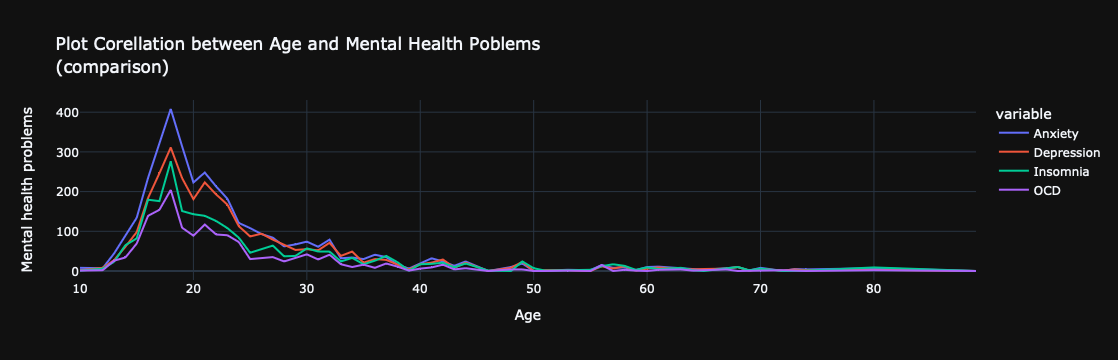

In [243]:
#Plot with a comparasion of mental problems
fig = px.line(
    df3d, 
    x="Age",
    y=["Anxiety", 'Depression','Insomnia','OCD'],
    title='Plot Corellation between Age and Mental Health Poblems<br>(comparison)',
    template='plotly_dark',
)

fig.update_layout(
    yaxis_title='Mental health problems',
)

fig.show()

This is straight up comparison and of course 18 y.o. have the highest value

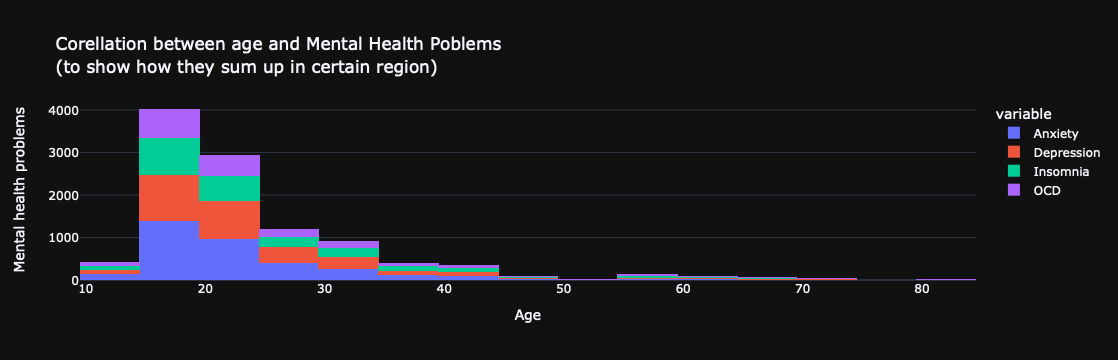

In [244]:
#Histogram to show the sum
fig = px.histogram(
    df3d, 
    x='Age', 
    y=["Anxiety", 'Depression','Insomnia','OCD'],
    title='Corellation between age and Mental Health Poblems<br>(to show how they sum up in certain region)',
    template='plotly_dark'
    #barmode = 'overlay'
)

fig.update_layout(
    yaxis_title='Mental health problems',
)

fig.show()

<b>Here we can see summarized regions for the period of 4 years.</b><br>The greates one is 15-19 y.o.<br>The second greatest is 20-24 y.o.

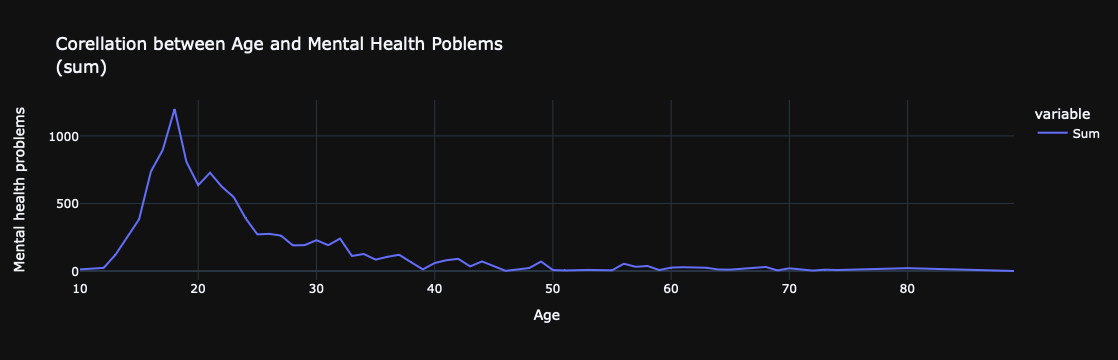

In [245]:
#Line graph with a sum
fig = px.line(
    df3d, 
    x="Age",
    y=['Sum'],
    title='Corellation between Age and Mental Health Poblems<br>(sum)',
    template='plotly_dark',
)

fig.update_layout(
    yaxis_title='Mental health problems',
)

fig.show()

<b>My hypothesis was right.</b><br>It is actually true that the most stressed year in person's life is the 18-th year. But this results can also appear because of the quantity of Young people( < 30 y.o.) in this dataset (75%). This is why this information may be false in general but for this exact dataset it is true

##### Mean(Age)

<b>This is the same graphs but with mean values instead of sum values.</b><br>They are not so clear and evident as the previouse ones and this is why I won't analyse them, just show.

In [246]:
df3d = dfcop.loc[:,['Age','Anxiety','Depression','Insomnia','OCD']]

# try to make a linear graph of hours and mental health problems

df3d = df3d.groupby('Age', as_index= False).mean()

#fig = px.line_3d(df3d, x="Age", y='Hours per day'z="Anxiety")
#fig.show()

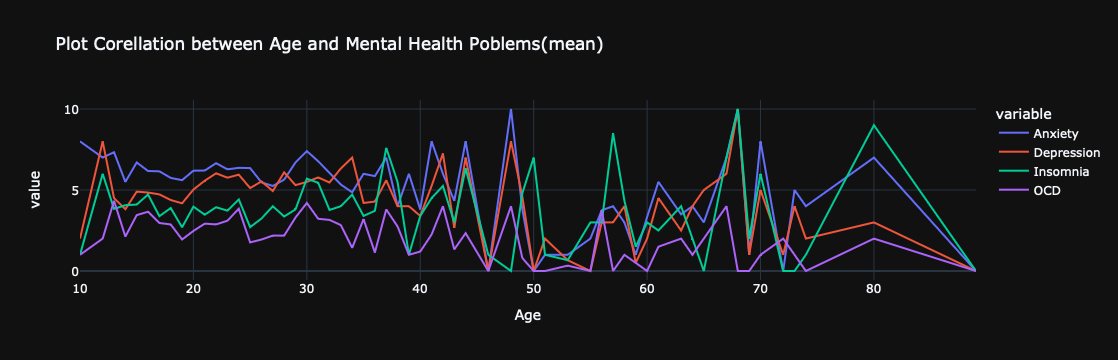

In [247]:
#Plot
fig = px.line(
    df3d, 
    x="Age",
    y=["Anxiety", 'Depression','Insomnia','OCD'],
    title='Plot Corellation between Age and Mental Health Poblems(mean)',
    template='plotly_dark'
)
fig.show()

As I said, they are not evident

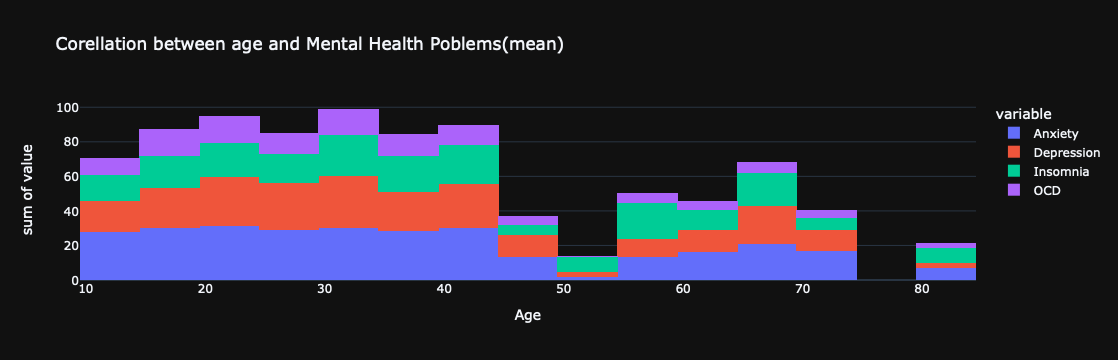

In [248]:
#Plot
fig = px.histogram(
    df3d, 
    x='Age', 
    y=["Anxiety", 'Depression','Insomnia','OCD'],
    title='Corellation between age and Mental Health Poblems(mean)',
    template='plotly_dark'
    #barmode = 'overlay'
)
fig.show()

### Hours per day analyze

#### Check for the most popular amount of hours per day

Here I'll find the most popular amount of time that people spend on music daily.<br>This will help us with the future graphs

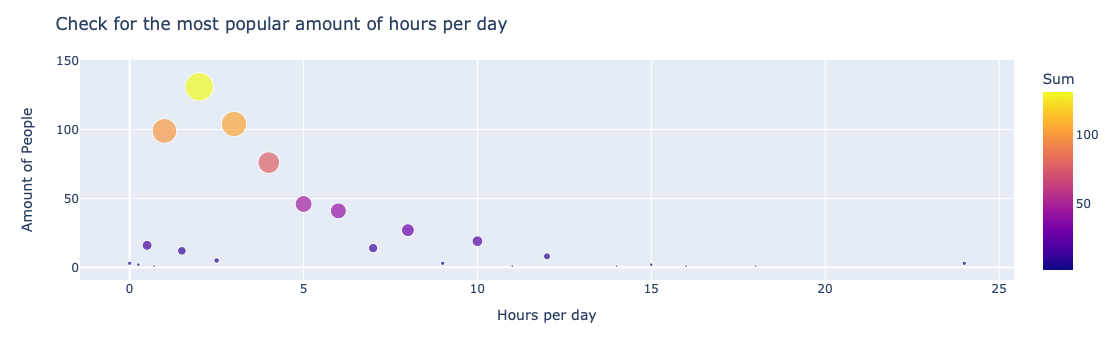

In [263]:
#Create new df with new column 'Sum'
dfH = dfcop.loc[:,['Hours per day']]
dfH['Sum'] = 1

#Groupby it by 'Hours per day', sum values and then sort
dfH = dfH.groupby('Hours per day', as_index= False).sum()
dfH.sort_values('Sum', ascending=False, inplace=True)

#Plot
fig = px.scatter(
    dfH, 
    x='Hours per day', 
    y='Sum',
    size='Sum',
    color='Sum'
)

fig.update_layout(
    yaxis_title ='Amount of People',
    title='Check for the most popular amount of hours per day'
)
fig.show()

<b>The most popular amount of hours that people spend on music daily is <u>2</u></b><br>
<b>Second</b> place holds <u>3 hours</u><br>
<b>Third</b> one is for <u>1 hour</u><br>
And <b>fourth</b> place is for <u>4 hours</u>

#### Corellation between hours and mental health problems

##### Sum(Hours)

In [266]:
#Create new df and groupby it by 'Hours per day'
df3dH = dfcop.loc[:,['Anxiety','Depression','Insomnia','OCD','Hours per day']]
df3dH = df3dH.groupby('Hours per day', as_index= False).sum()

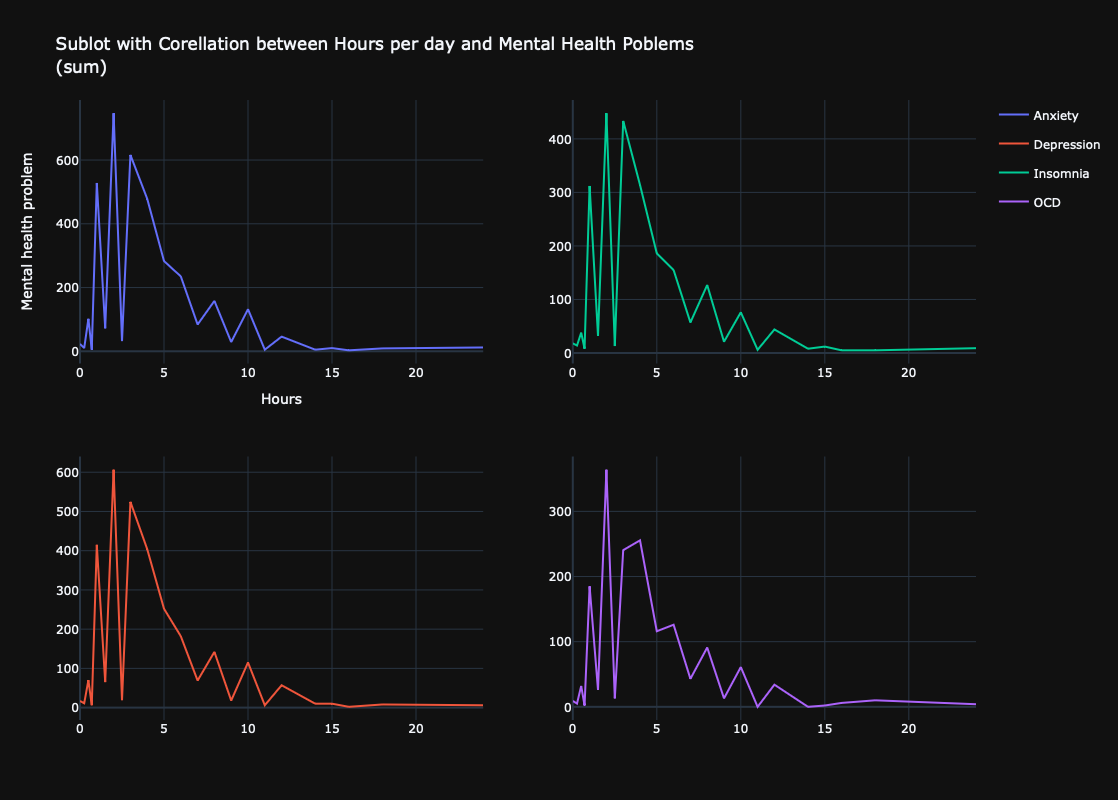

In [267]:
#the same structure i've used in Age section
figures = [
    px.line(
        df3dH, 
        x="Hours per day",
        y=["Anxiety"],
        title='Corellation between age and Mental Health Poblems',
        width = 300,
        height = 300,
        color_discrete_sequence=[px.colors.qualitative.Plotly[0]],
    ),
    
    px.line(
        df3dH, 
        x="Hours per day",
        y=['Depression'],
        title='Corellation between age and Mental Health Poblems',
        width = 300,
        height = 300,
        color_discrete_sequence=[px.colors.qualitative.Plotly[1]],
    ),
]

figures2 = [ 
    px.line(
        df3dH, 
        x="Hours per day",
        y=['Insomnia'],
        title='Corellation between age and Mental Health Poblems',
        width = 300,
        height = 300,
        color_discrete_sequence=[px.colors.qualitative.Plotly[2]]
    ),
    
    px.line(
        df3dH, 
        x="Hours per day",
        y=['OCD'],
        title='Corellation between age and Mental Health Poblems',
        width = 300,
        height = 300,
        color_discrete_sequence=[px.colors.qualitative.Plotly[3]]
    ),
    ]

fig = make_subplots(rows=len(figures), cols=2) 


for i, figure in enumerate(figures):
    for trace in range(len(figure["data"])):
        fig.append_trace(figure["data"][trace], row=i+1, col=1)

for i, figure in enumerate(figures2):
    for trace in range(len(figure["data"])):
        fig.append_trace(figure["data"][trace], row=i+1, col=2)


fig.update_layout(
    height=800, 
    width=1100, 
    title_text="Sublot with Corellation between Hours per day and Mental Health Poblems<br>(sum)", 
    xaxis_title='Hours',
    yaxis_title='Mental health problem',
    template='plotly_dark',
)
fig.show()

<b>As we can see</b>
<br>2 hours per day have first place
<br>3 hours have second
<br>4 hours have 3rd
<br>1 hour have 4th
<b>
<br>It is really interesting because there is more people who spend 1 hour than 4 hours daily on music.
<br>But still, people who spend 4 hours have the sum with more mental health problems than people who spend 1 hour.
</b>
<br>Other places match with previouse plot


##### Mean(Hours)

This graph is not for my analysis, i just want to show it

In [271]:
#Create df and groupby by 'Hours per day'
df3dH = dfcop.loc[:,['Anxiety','Depression','Insomnia','OCD','Hours per day']]
df3dH = df3dH.groupby('Hours per day', as_index= False).mean()

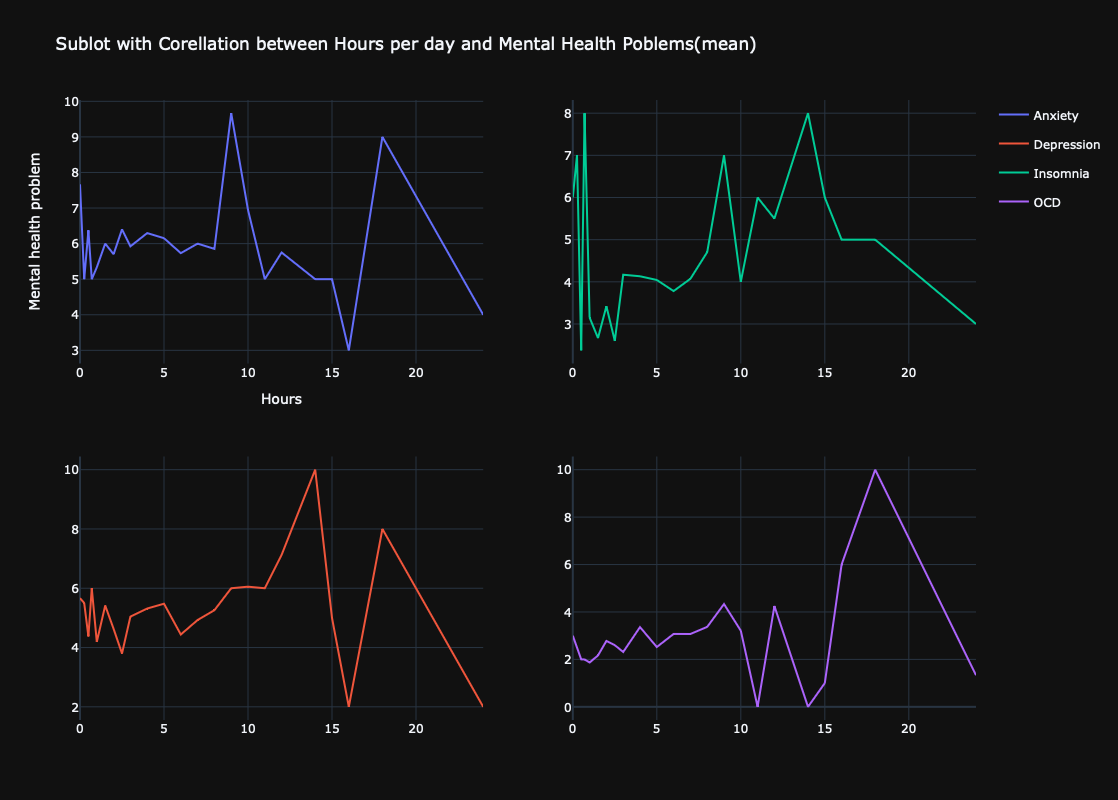

In [272]:
#the same structure i've used in Age section
figures = [
    px.line(
        df3dH, 
        x="Hours per day",
        y=["Anxiety"],
        title='Corellation between age and Mental Health Poblems',
        width = 300,
        height = 300,
        color_discrete_sequence=[px.colors.qualitative.Plotly[0]],
    ),
    
    px.line(
        df3dH, 
        x="Hours per day",
        y=['Depression'],
        title='Corellation between age and Mental Health Poblems',
        width = 300,
        height = 300,
        color_discrete_sequence=[px.colors.qualitative.Plotly[1]],
    ),
]

figures2 = [ 
    px.line(
        df3dH, 
        x="Hours per day",
        y=['Insomnia'],
        title='Corellation between age and Mental Health Poblems',
        width = 300,
        height = 300,
        color_discrete_sequence=[px.colors.qualitative.Plotly[2]]
    ),
    
    px.line(
        df3dH, 
        x="Hours per day",
        y=['OCD'],
        title='Corellation between age and Mental Health Poblems',
        width = 300,
        height = 300,
        color_discrete_sequence=[px.colors.qualitative.Plotly[3]]
    ),
    ]

fig = make_subplots(rows=len(figures), cols=2) 


for i, figure in enumerate(figures):
    for trace in range(len(figure["data"])):
        fig.append_trace(figure["data"][trace], row=i+1, col=1)

for i, figure in enumerate(figures2):
    for trace in range(len(figure["data"])):
        fig.append_trace(figure["data"][trace], row=i+1, col=2)


fig.update_layout(
    height=800, 
    width=1100, 
    title_text="Sublot with Corellation between Hours per day and Mental Health Poblems(mean)", 
    xaxis_title='Hours',
    yaxis_title='Mental health problem',
    template='plotly_dark',
)
fig.show()

## Difference between musicians and non-musicans

There I'll try to find some difference between musicians and not a musicians

### Separate musicians and non-muscians

In [273]:
#There I'll create df with only musician(df.Instrumentalist == 'Yes' or df.Composer == 'Yes')
dfArt1 = df.drop(df[(df.Instrumentalist == 'No')].index)
dfArt2 = df.drop(df[df.Composer == 'No'].index)
dfArt = pd.concat([dfArt1, dfArt2])
dfArt

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NotStated,I understand.
5,8/27/2022 21:56:50,18.0,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,...,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,I understand.
6,8/27/2022 22:00:29,18.0,YouTube Music,3.0,Yes,Yes,No,Video game music,Yes,Yes,...,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,I understand.
10,8/27/2022 22:51:15,18.0,Spotify,3.0,Yes,Yes,No,Country,Yes,No,...,Rarely,Never,Rarely,Never,7.0,7.0,4.0,7.0,No effect,I understand.
14,8/27/2022 23:16:06,18.0,Spotify,4.0,Yes,Yes,No,Jazz,Yes,Yes,...,Never,Never,Sometimes,Rarely,6.0,4.0,7.0,0.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,10/2/2022 7:52:02,17.0,Spotify,4.0,Yes,Yes,Yes,Country,Yes,Yes,...,Rarely,Rarely,Sometimes,Never,2.0,0.0,0.0,2.0,Improve,I understand.
709,10/4/2022 0:48:34,35.0,Spotify,4.0,Yes,Yes,Yes,Hip hop,Yes,No,...,Very frequently,Very frequently,Sometimes,Very frequently,7.0,8.0,6.0,5.0,Improve,I understand.
710,10/4/2022 4:50:49,16.0,Spotify,8.0,Yes,Yes,Yes,Rock,Yes,No,...,Rarely,Never,Very frequently,Sometimes,8.0,9.0,5.0,10.0,Improve,I understand.
715,10/4/2022 19:43:11,21.0,Spotify,4.0,Yes,Yes,Yes,Pop,No,No,...,Sometimes,Rarely,Sometimes,Never,4.0,6.0,3.0,4.0,Improve,I understand.


In [276]:
#Mental problems that musicians have
dfMentalA = dfArt.loc[:,['Anxiety','Depression','Insomnia','OCD']]
dfMentalA = dfMentalA.assign(Sum1=lambda x: x.OCD + x.Anxiety + x.Depression + x.Insomnia)
dfMentalAM = dfMentalA.mean().round(2)
dfMentalAS = dfMentalA.sum().round(2)

In [274]:
#There I'll create df with only non-musician(df.Instrumentalist == 'No' | df.Composer == 'No')
dfNoArt= df.drop(df[(df.Instrumentalist == 'Yes')|(df.Composer == 'Yes') ].index)
dfNoArt

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NotStated,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
7,8/27/2022 22:18:59,21.0,Spotify,1.0,Yes,No,No,K pop,Yes,Yes,...,Sometimes,Rarely,Never,Rarely,5.0,3.0,5.0,3.0,Improve,I understand.
8,8/27/2022 22:33:05,19.0,Spotify,6.0,Yes,No,No,Rock,No,No,...,Never,Never,Very frequently,Never,2.0,0.0,0.0,0.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,10/23/2022 20:50:27,18.0,Apple Music,18.0,Yes,No,No,EDM,Yes,No,...,Sometimes,Sometimes,Sometimes,Sometimes,9.0,8.0,5.0,10.0,Improve,I understand.
727,10/26/2022 19:45:54,26.0,YouTube Music,1.0,Yes,No,No,Metal,Yes,Yes,...,Never,Never,Never,Rarely,0.0,0.0,0.0,0.0,No effect,I understand.
729,10/30/2022 13:13:32,21.0,I do not use a streaming service.,0.5,No,No,No,Pop,Yes,No,...,Sometimes,Sometimes,Very frequently,Never,6.0,2.0,2.0,0.0,Improve,I understand.
730,10/30/2022 13:15:26,21.0,Spotify,2.0,Yes,No,No,R&B,Yes,Yes,...,Very frequently,Sometimes,Sometimes,Sometimes,7.0,6.0,4.0,6.0,Improve,I understand.


In [277]:
#Mental problems that non-musicians have
dfMentalNoA = dfNoArt.loc[:,['Anxiety','Depression','Insomnia','OCD']]
dfMentalNoA = dfMentalNoA.assign(Sum2=lambda x: x.OCD + x.Anxiety + x.Depression + x.Insomnia)
dfMentalNoAM = dfMentalNoA.mean().round(2)
dfMentalNoAS = dfMentalNoA.sum().round(2)

### Trying to find corelations and difference between Musicians and Non-Musicians

There I'll compare favourite genres that musicians and non-musicians have

#### Difference in favourite genres

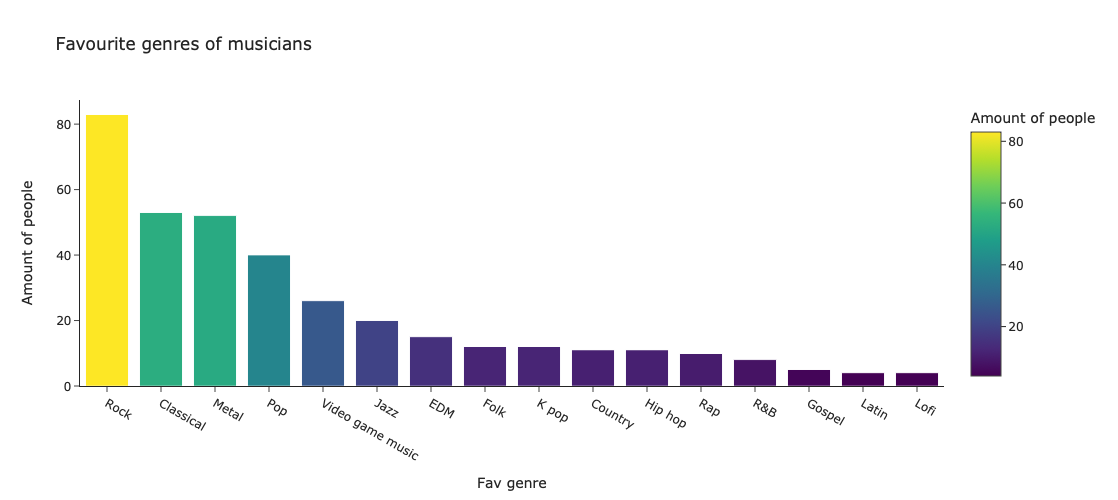

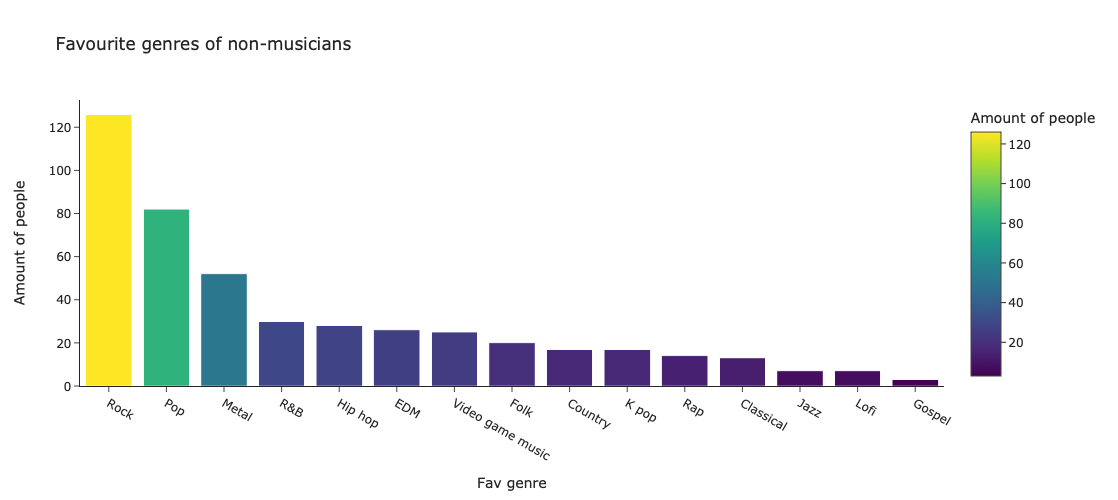

In [258]:
dfG = dfArt.loc[:,['Fav genre']]

dfG['Amount of people'] = 1

dfSumG = dfG.groupby('Fav genre',as_index= False).sum()
dfSumG.sort_values('Amount of people', ascending=False, inplace=True)

fig1 = px.bar(
    dfSumG, 
    x='Fav genre',
    y='Amount of people', 
    color = 'Amount of people',
    title='Favourite genres of musicians',
    height=500,
    width=1000,
    template="simple_white",
)
fig1.show()


dfG2 = dfNoArt.loc[:,['Fav genre']]

dfG2['Amount of people'] = 1

dfSumG2 = dfG2.groupby('Fav genre',as_index= False).sum()
dfSumG2.sort_values('Amount of people', ascending=False, inplace=True)

fig2 = px.bar(
    dfSumG2, 
    x='Fav genre',
    y='Amount of people', 
    color = 'Amount of people',
    title='Favourite genres of non-musicians',
    height=500,
    width=1000,
    template="simple_white",
)
fig2.show()

<b>There is interesting thing that Classical music is listened by only musician in this exact dataset</b>

#### Difference in Mental health problems

I have a hypothesis that musicians have more mental health problems than ordinary people

In [259]:
print(dfMentalAM)
print(dfMentalAS)
print('____________________')
print(dfMentalNoAM)
print(dfMentalNoAS)

Anxiety        5.91
Depression     4.93
Insomnia       4.04
OCD            2.71
Sum1          17.58
dtype: float64
Anxiety       2162.0
Depression    1804.5
Insomnia      1478.5
OCD            990.5
Sum1          6435.5
dtype: float64
____________________
Anxiety        5.81
Depression     4.77
Insomnia       3.63
OCD            2.63
Sum2          16.84
dtype: float64
Anxiety       2714.5
Depression    2228.5
Insomnia      1696.0
OCD           1227.5
Sum2          7866.5
dtype: float64


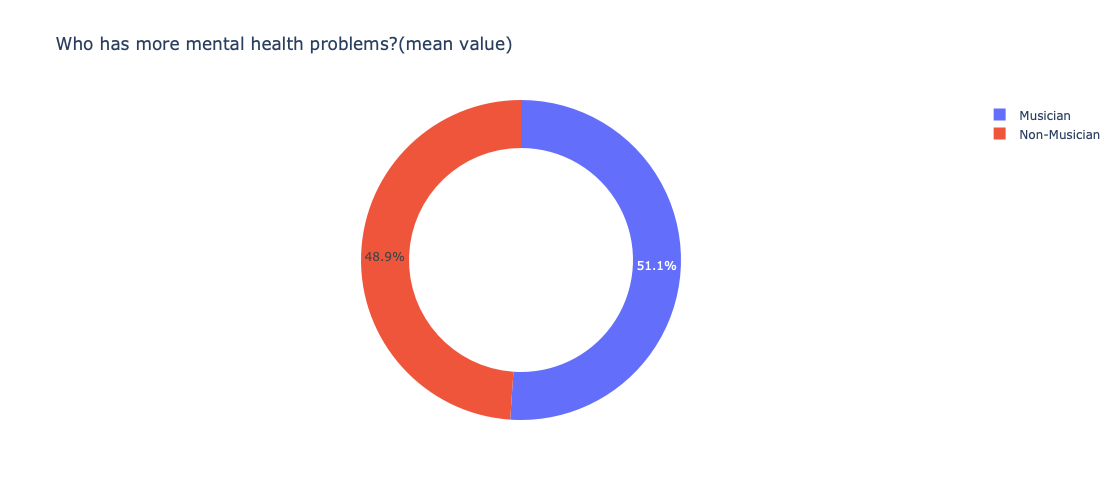

In [279]:
#Plot
fig = px.pie(
    values=[17.58, 16.84], 
    names=['Musician','Non-Musician'],
    title='Who has more mental health problems?(mean value)',
    hole=.7,
    width=1000,
    height=500,
    template='plotly',
)
fig.show()

<b>I think my hypothesis was wrong because there is a so small difference(2.2%) that we can count it like a error</b>

# Conclusion

There is last column my dataset that I want to check. This column gives us information about music's help with mental health problems
<br>My hypothesis that music will help the vast majority of people

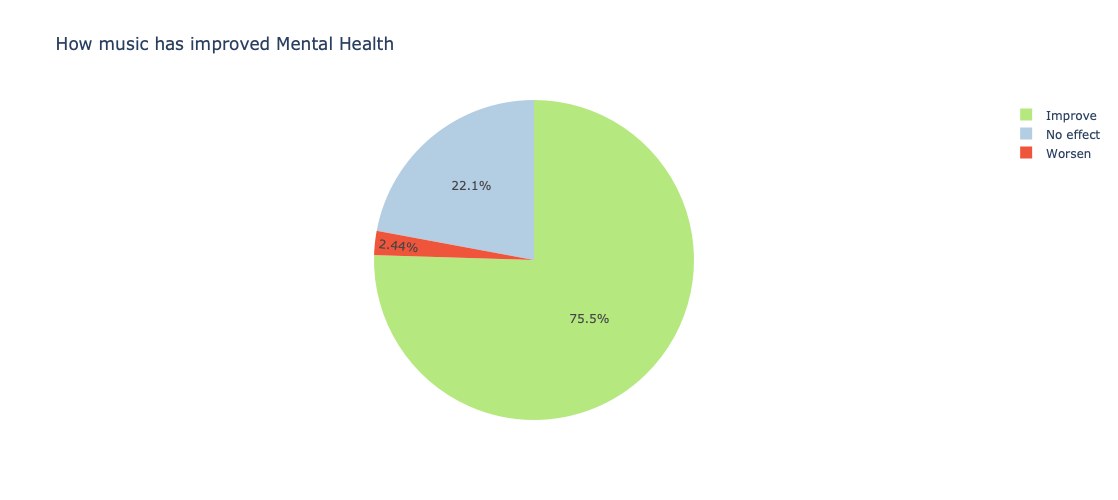

In [280]:
#Create df
dfHealth = dfcop.loc[:,['Music effects']]
dfHealth['Calc'] = 1

fig = px.pie(
    dfHealth, 
    values='Calc', 
    names='Music effects',
    title='How music has improved Mental Health',
    width=1000,
    height=500,
    color_discrete_sequence=[px.colors.qualitative.Plotly[7], px.colors.qualitative.Pastel1[1], px.colors.qualitative.Plotly[1]]
)
fig.show()

<b>My hypothesis was right</b>